# Company Bankruptcy Prediction

## Importing Libraries 

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from flask import *

## Load Dataset


In [ ]:
dataset = pd.read_csv('bankrupcy.csv')
dataset.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Exploratory Data Analysis

In [ ]:
dataset.shape  #numbers of rows and columns 

(4999, 96)

In [ ]:
dataset.describe() 

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4998.000000,4.998000e+03,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.0,4998.000000
mean,0.038408,0.503515,0.556601,0.552329,0.607673,0.607654,0.998864,0.797277,0.809154,0.303547,...,0.806299,1.641337e+07,0.623936,0.607671,0.840206,0.280703,0.027754,0.565299,1.0,0.047779
std,0.192198,0.062024,0.067641,0.063560,0.018156,0.018142,0.005568,0.009598,0.011881,0.007824,...,0.041959,3.595961e+08,0.009879,0.018157,0.016739,0.016667,0.018217,0.014292,0.0,0.053145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.612132,0.160516,0.000000,0.000000,...,0.000000,0.000000e+00,0.408682,0.000000,0.000000,0.000000,0.000789,0.000000,1.0,0.008500
25%,0.000000,0.474967,0.533744,0.525885,0.600153,0.600149,0.998964,0.797381,0.809308,0.303460,...,0.796143,9.154884e-04,0.623560,0.600149,0.840059,0.276957,0.026791,0.565158,1.0,0.023676
50%,0.000000,0.500366,0.557894,0.550779,0.605796,0.605796,0.999020,0.797457,0.809370,0.303521,...,0.809023,2.306573e-03,0.623837,0.605797,0.841067,0.278935,0.026811,0.565266,1.0,0.032871
75%,0.000000,0.533710,0.586513,0.582820,0.614213,0.614138,0.999097,0.797569,0.809463,0.303573,...,0.825034,6.208718e-03,0.624140,0.614215,0.842272,0.281856,0.026939,0.565849,1.0,0.052669
max,1.000000,0.971530,1.000000,1.000000,1.000000,1.000000,0.999778,1.000000,1.000000,0.730252,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 4999 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  4999 non-null   float64
 2    ROA(A) before interest and % after tax                   4999 non-null   float64
 3    ROA(B) before interest and depreciation after tax        4999 non-null   float64
 4    Operating Gross Margin                                   4999 non-null   float64
 5    Realized Sales Gross Margin                              4999 non-null   float64
 6    Operating Profit Rate                                    4999 non-null   float64
 7    Pre-tax net Interest Rate                                4999 non-null   float64
 8    After-tax net Int

### Check if the dataset has duplicate values


In [ ]:
dataset.duplicated().sum()

0

### Check if the dataset has has any null values


In [ ]:
dataset.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        1
 Degree of Financial Leverage (DFL)                         1
 Interest Coverage Ratio (Interest expense to EBIT)         1
 Net Income Flag                                            1
 Equity to Liability                                        1
Length: 96, dtype: int64

### Statistical measures for last five features


In [ ]:
dataset.mean().tail()

 Liability to Equity                                   0.280703
 Degree of Financial Leverage (DFL)                    0.027754
 Interest Coverage Ratio (Interest expense to EBIT)    0.565299
 Net Income Flag                                       1.000000
 Equity to Liability                                   0.047779
dtype: float64

In [ ]:
dataset.std().tail()

 Liability to Equity                                   0.016667
 Degree of Financial Leverage (DFL)                    0.018217
 Interest Coverage Ratio (Interest expense to EBIT)    0.014292
 Net Income Flag                                       0.000000
 Equity to Liability                                   0.053145
dtype: float64

In [ ]:
dataset.min().tail()

 Liability to Equity                                   0.000000
 Degree of Financial Leverage (DFL)                    0.000789
 Interest Coverage Ratio (Interest expense to EBIT)    0.000000
 Net Income Flag                                       1.000000
 Equity to Liability                                   0.008500
dtype: float64

In [ ]:
dataset.max().tail()

 Liability to Equity                                   1.0
 Degree of Financial Leverage (DFL)                    1.0
 Interest Coverage Ratio (Interest expense to EBIT)    1.0
 Net Income Flag                                       1.0
 Equity to Liability                                   1.0
dtype: float64

## Data Visualization


### Get count for unique values in target variable

In [ ]:
dataset['Bankrupt?'].value_counts()


0    4807
1     192
Name: Bankrupt?, dtype: int64

Text(0.5, 1.0, 'Target Variable')

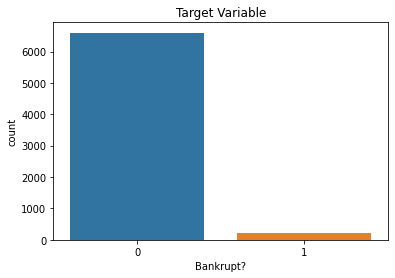

In [ ]:
sns.countplot(x=dataset['Bankrupt?'])
plt.title('Target Variable')

### Checking outlier for Features 

Text(0.5, 1.0, 'Bankrupt vs Tot Debt/Net worth Correlation')

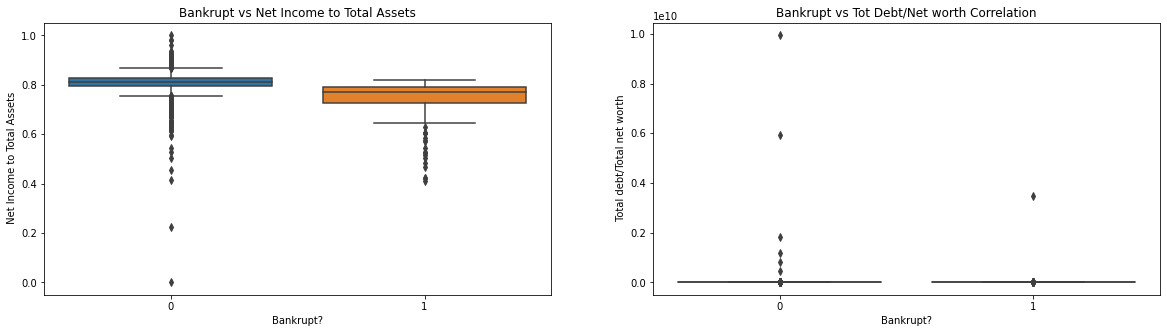

In [ ]:
f, axes = plt.subplots(ncols=2, figsize=(20,5))

sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=dataset, ax=axes[0])
axes[0].set_title('Bankrupt vs Net Income to Total Assets')
sns.boxplot(x='Bankrupt?', y=" Total debt/Total net worth", data=dataset, ax=axes[1]) 
axes[1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


### Visualize Histogram for all features

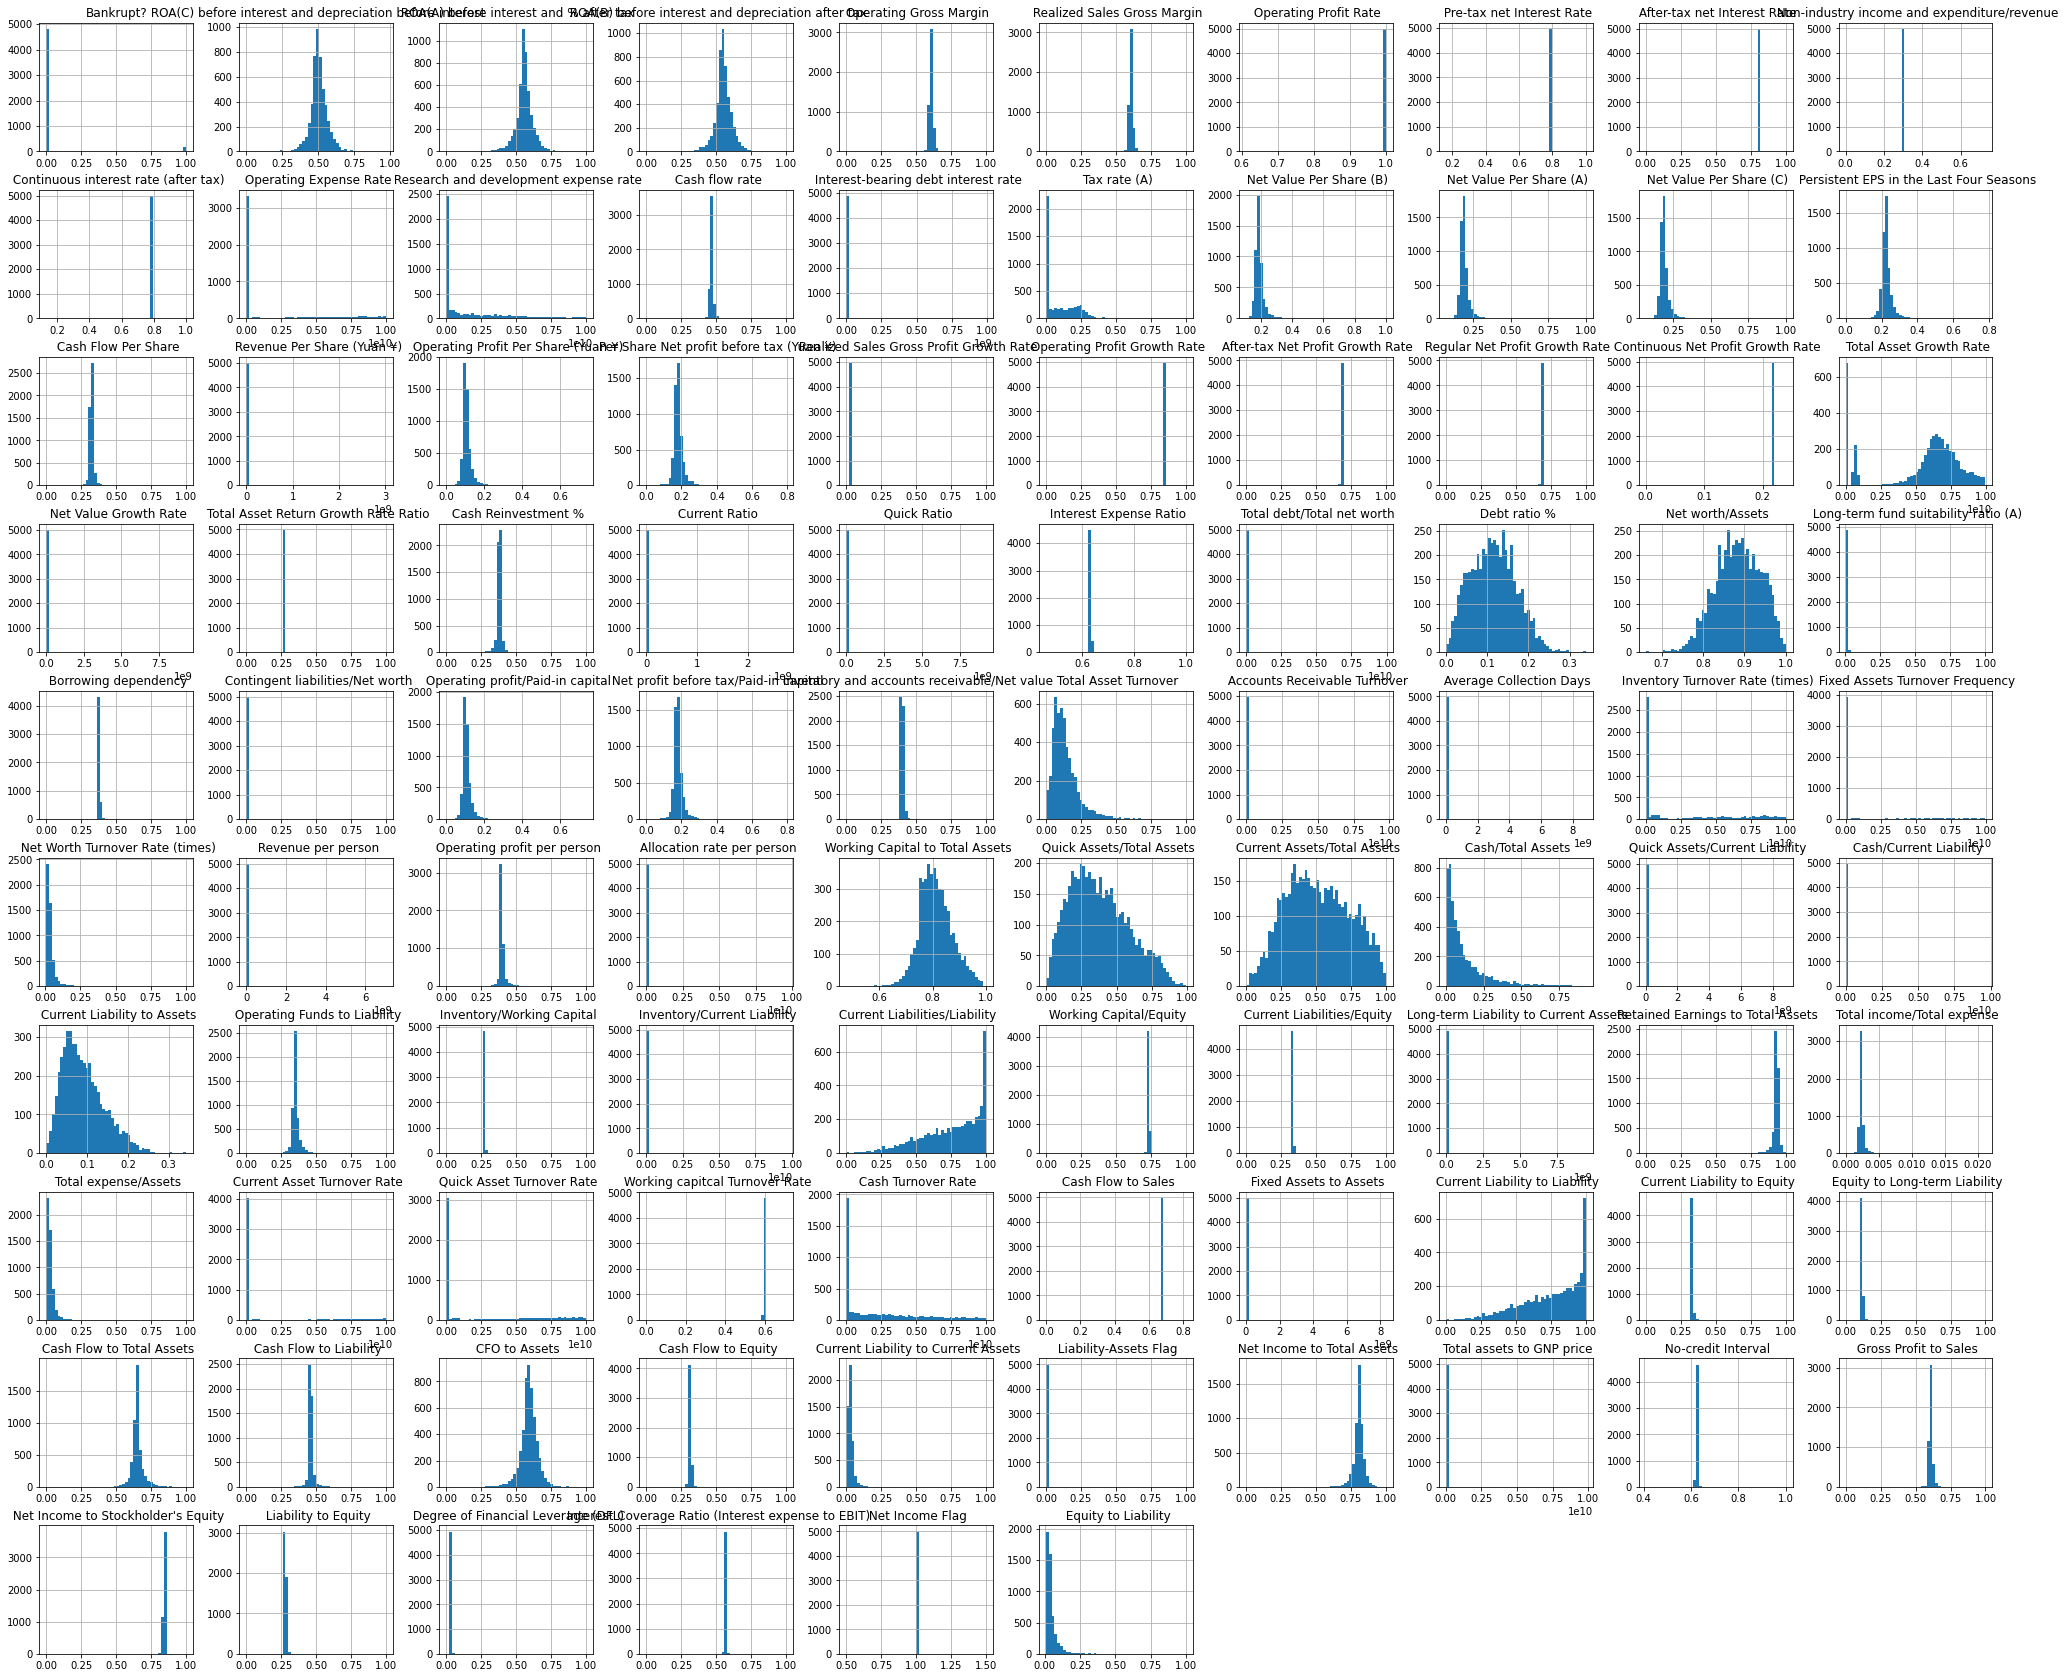

In [ ]:
dataset.hist(figsize = (35,30), bins = 50)
plt.show()

### correlation heatmap for selected features


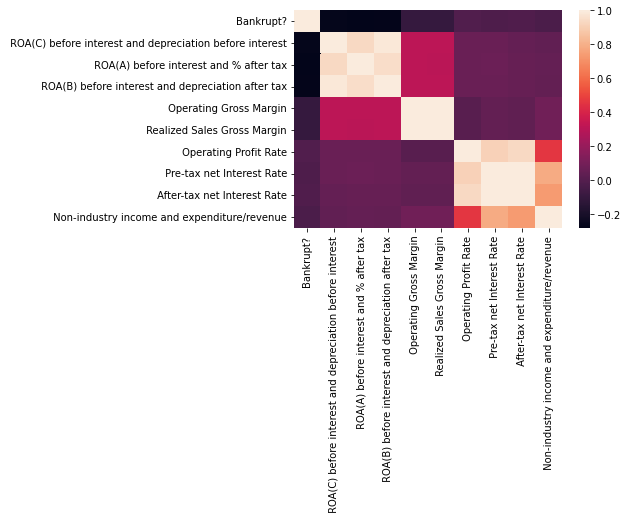

In [ ]:
col_names = dataset.columns
req_col = col_names[:10]
corr = dataset[req_col].corr()
sns.heatmap(corr)
plt.show()

## Train Test Split

In [ ]:
x = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Data Scaling

In [ ]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

## Model Creation with hyperparameter tuning

In [ ]:
model = SVC(random_state=0)
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['rbf','linear']} 
  
grid = GridSearchCV(model, param_grid, refit = True, scoring='accuracy')
# c = [0.1, 1, 10] 
# gamma = [1, 0.1, 0.01],
# kernel = ['rbf','linear']
# grid = dict(C=c,gamma=gamma,kernel=kernel)
# grid_search = GridSearchCV(model, param_grid=grid)
grid_result = grid.fit(x_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.968836 using {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
y_pred = grid_result.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.966275659824047

# Flask APPI

In [ ]:
app = Flask(__name__)

## Route for Visualization

In [ ]:
# @app.route('/visualize')
# def visualize():
  

AttributeError: ignored

## Route for prediction

In [ ]:
@app.route('/predict', methods=['GET', 'POST'])
def get_prediction():
  # if request.method == 'POST':  
  #     if request.files:
  #       dataset = dataset.files['file'] 

  # x = dataset.iloc[:, 1:].values
  # y = dataset.iloc[:, 0].values
  
  # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
  
  # sc_x = StandardScaler()
  # x_train = sc_x.fit_transform(x_train)
  # x_test = sc_x.transform(x_test)
  
  # model = SVC(random_state=0)
  # param_grid = {'C': [0.1, 1], 
  #               'gamma': [1, 0.1, 0.01],
  #               'kernel': ['rbf','linear']} 
    
  # grid = GridSearchCV(SVC(), param_grid, refit = True, scoring='accuracy')
  
  # grid_result = grid.fit(x_train, y_train)
  
  # print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  y_pred = grid_result.predict(x_train)
  return {"The model prediction is ": jsonify(y_pred)}


## Route for retraining

In [ ]:
@app.route('/retrain',  methods=['GET', 'POST'])
def retrain():
  if request.method == 'POST':  
      if request.files:
        dataset = dataset.files['file'] 
  x = dataset.iloc[:, 1:].values
  y = dataset.iloc[:, 0].values
  
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
  
  sc_x = StandardScaler()
  x_train = sc_x.fit_transform(x_train)
  x_test = sc_x.transform(x_test)
  
  model = SVC(random_state=0)
  param_grid = {'C': [0.1, 1], 
                'gamma': [1, 0.1, 0.01],
                'kernel': ['rbf','linear']} 
    
  grid = GridSearchCV(SVC(), param_grid, refit = True, scoring='accuracy')
  
  grid_result = grid.fit(x_train, y_train)
  
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  y_pred = grid_result.predict(x_train)
  return {"message":"model retrained","The model prediction is ": jsonify(y_pred)}

In [ ]:
if __name__ == '__main__':
 
    # run() method of Flask class runs the application
    # on the local development server.
    app.run()